# The Confusion Matrix

### 1. Theory

One of the most simple methods for analysing the performance of classification models is the confusion matrix. The idea is that we have a matrix $\mathcal{C}$ whose elements $\mathcal{C}_{kl}$ give the number of observed samples with the ground truth class label $y=C_k$ and the predicted label class $\hat{y} = C_l$. Of course, we have correct classfications when $k=l$ (the predicted and ground truth label are the same) and ideally should expect to see these elements $\mathcal{C}_{kl}$ where $k=l$ to be the largest. This means that the diagonal of the confusion matrix $\mathcal{C}$ should have the largest values,

$$
\mathcal{C} =
\begin{bmatrix}
\mathcal{C}_{00} & \mathcal{C}_{01} & \mathcal{C}_{02} & \cdots & \mathcal{C}_{0, M-1} \\
\mathcal{C}_{10} & \mathcal{C}_{11} & \mathcal{C}_{12} & \cdots & \mathcal{C}_{1, M-1} \\
\mathcal{C}_{20} & \mathcal{C}_{21} & \mathcal{C}_{22} & \cdots & \mathcal{C}_{2, M-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\mathcal{C}_{M-1, 0} & \mathcal{C}_{M1} & \mathcal{C}_{M2} & \cdots & \mathcal{C}_{M-1, M-1}
\end{bmatrix}
$$

Many useful metrics can be calcaulted from the confusion matrix $\mathcal{C}$. In binary classification, we have two class $M=2$ and our confusion matrix can be written as,

$$
\mathcal{C} =
\begin{bmatrix}
\mathcal{C}_{00} & \mathcal{C}_{01}  \\
\mathcal{C}_{10} & \mathcal{C}_{11}  \\
\end{bmatrix}
$$

By convention, $0$ is the label for the negative class and $1$  for the positive class. Therefore, $\mathcal{C}_{00}$ is the number true negatives, $\mathcal{C}_{01}$ the false positives, $\mathcal{C}_{10}$ the false negatives and $\mathcal{C}_{10}$ for true positives. Using our confusion matrix, we may compute the classification accuracy, precision and recall across all classes,

$$
\text{accuracy} = \frac{\mathcal{C}_{00} + \mathcal{C}_{11}}{\mathcal{C}_{00} + \mathcal{C}_{01} + \mathcal{C}_{10} + \mathcal{C}_{11}}
$$

$$
\text{RE}_0 = \frac{\mathcal{C}_{00}}{\mathcal{C}_{01} + \mathcal{C}_{00}} \quad \text{RE}_1 = \frac{\mathcal{C}_{11}}{\mathcal{C}_{10} + \mathcal{C}_{11}}
$$

$$
\text{PR}_0 = \frac{\mathcal{C}_{00}}{\mathcal{C}_{10} + \mathcal{C}_{00}} \quad \text{PR}_1 = \frac{\mathcal{C}_{11}}{\mathcal{C}_{01} + \mathcal{C}_{11}}
$$

Note that precision only concerns the model predictions while recall is tied with the ground truth. For more general classification problems where we have more than two class labels $M > 2$,

$$
\text{accuracy} = \frac{\sum^{M-1}_{k=0}\mathcal{C}_{kk}}{\sum^{M-1}_{l=0} \sum^{M-1}_{k=0}\mathcal{C}_{kl}}  = \frac{\text{Sum} \left( \text{Diag}(\mathcal{C}) \right)}{\text{Sum}(\mathcal{C})}
$$

$$
\text{RE}_i = \frac{\mathcal{C}_{ii}}{\sum^{M-1}_{k=0}\mathcal{C}_{ik}} \Longrightarrow \text{RE} = \frac{\text{Diag}(\mathcal{C})}{\text{Sum}(\mathcal{C}, \text{axis = 0})}
$$

$$
\text{PR}_i = \frac{\mathcal{C}_{ii}}{\sum^{M-1}_{k=0}\mathcal{C}_{ki}} \Longrightarrow \text{RE} = \frac{\text{Diag}(\mathcal{C})}{\text{Sum}(\mathcal{C}, \text{axis = 1})}
$$



We can combine recall $\text{RE}_i$ and precision $\text{PR}_i$ for a given class $i$ into an F-score which is given by their harmonic mean,

$$
F_1^{(i)} = 2 \left( \frac{1}{\text{RE}_i^{-1} + \text{PR}_i^{-1}} \right) = 2 \left( \frac{\text{RE}_i \cdot \text{PR}_i}{\text{RE}_i + \text{PR}_i} \right)
$$

It is not uncommon to also consider the weighted F-score $F_{\beta}$ where recall contribues by a factor $\beta$ more than precision to the final score,

$$
F_{\beta}^{(i)} = \frac{1 + \beta^2}{\beta^2 \text{RE}_i^{-1} + \text{PR}_i^{-1}} = (1 + \beta^2) \left( \frac{\text{RE}_i \cdot \text{PR}_i}{\text{RE}_i + \beta^2\text{PR}_i} \right)
$$

### 2. In Practice

Using Sci-kit learn, we train an SVC using OVR to classify between $8 \times 8$ images of hand-written digits from $0$ to $9$. The dataset is derived from https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits which used preprocessing programs made available by NIST to extract normalised bitmaps of handwritten digits. After model training, we are able to calculate the confusion matrix $\mathcal{C}$ of the model using sci-kit learn's functionality,

In [1]:
# Importing,
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Creating dataset,
digit_dataset = load_digits()
X, y = digit_dataset["data"], digit_dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training model,
clf = OneVsRestClassifier(SVC()) # <-- OvR scheme is a wrapper around the base model.
clf.fit(X_train, y_train)

# Creating and displaying confusion matrix,
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

In a more pretty form,

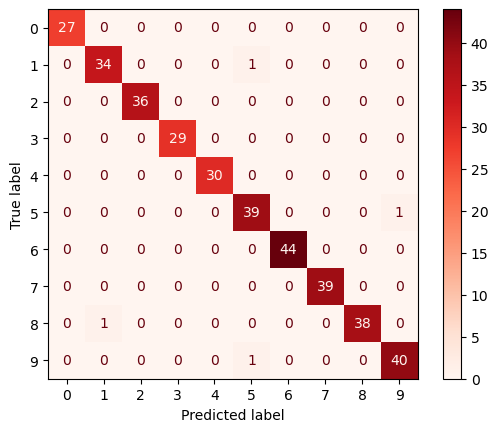

In [2]:
# Creating plot,
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Reds")
plt.show()

We can see that our classifier has very few misclassifications and that there is no trend to them. However, the results obtained by Grover and Toghi at https://ar5iv.labs.arxiv.org/html/1809.06846 from a KNN classifier show trends in their misclassifications. These trends are evident in the confusion matrix of their model. For example, if the number $1$ were to be misclassification by the model, it is most likely to be predicted as a $7$ compared to any another number (45% chance). This case highlights how the confusion matrix $\mathcal{C}$ of a model can give us useful insights on its performance. 

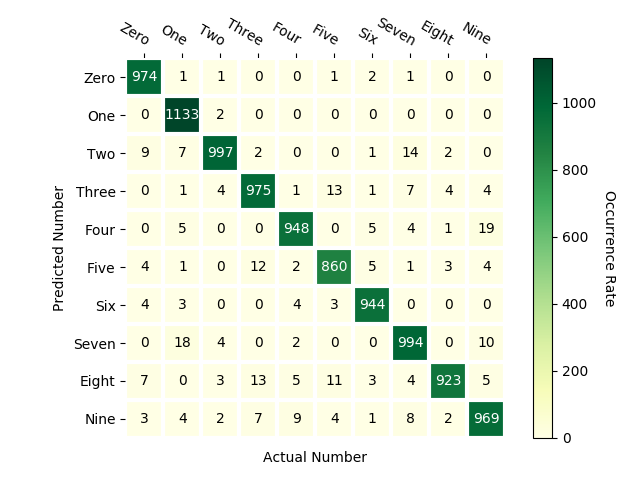

### 3. Implementation

Let us now implement our own version of the confusion matrix,

In [53]:
# Imports,
import numpy as np
import matplotlib.pyplot as plt

class ConfusionMatrix():
    """Class for the confusion matrix."""

    def __init__(self, clf, X, y):
        """Constructor method which computes the confusion matrix."""

        # Initialising confusion matrix,
        self.class_labels = np.unique(y)
        n_labels = len(self.class_labels)
        confusion_matrix = np.zeros(shape=(n_labels, n_labels), dtype=int)

        # Constructing confusion matrix,
        class_labels_preds = clf.predict(X) # <-- Predicted class labels.
        for class_label_pred, class_label in zip(class_labels_preds, y):
            class_label_pred, class_label = int(class_label_pred), int(class_label)
            confusion_matrix[class_label_pred, class_label] += 1

        # Assigning confusion matrix as an attribute,
        self.confusion_matrix = confusion_matrix

    def report(self, beta=1):
        """Prints a classification report."""

        # Computing metrics,
        precision = self.precision()
        recall = self.recall()
        support = self.support()
        fscores = self.fscore(beta)

        # Computing aggregate metrics,
        accuracy = self.accuracy()
        precision_mean, precision_weighted_mean  = np.mean(precision), np.average(precision, weights=support)
        recall_mean, recall_weighted_mean  = np.mean(recall), np.average(recall, weights=support)
        fscores_mean, fscores_weighted_mean  = np.mean(fscores), np.average(fscores, weights=support)

        # Printing report,
        print(f"Classification Accuracy: {accuracy:.3f}")
        print(f"β: {beta}\n")
        print(f"{'Class':<12}{'Precision':>10}{'Recall':>10}{'Fβ-score':>10}{'Support':>10}")
        print("-" * 52)

        for class_idx, class_label in enumerate(self.class_labels):
            print(f"{str(class_label):<12}{precision[class_idx]:>10.3f}{recall[class_idx]:>10.3f}{fscores[class_idx]:>10.3f}{support[class_idx]:>10}")

        print("-" * 52)
        print(f"{'Average':<16}{precision_mean:>10.3f}{recall_mean:>10.3f}{fscores_mean:>10.3f}")
        print(f"{'Weighted-average':<16}{precision_weighted_mean:>10.3f}{recall_weighted_mean:>10.3f}{fscores_weighted_mean:>10.3f}")

        return None

    def accuracy(self):
        """Computes the classification accuracy from confusion matrix."""
        return np.sum(np.diagonal(self.confusion_matrix))/np.sum(self.confusion_matrix)

    def precision(self):
        """Computes the precision of the model for each class and returns them as an array."""
        return np.diagonal(self.confusion_matrix)/np.sum(self.confusion_matrix, axis=1)

    def recall(self):
        """Computes the recall of the model for each class and returns them as an array."""
        return np.diagonal(self.confusion_matrix)/np.sum(self.confusion_matrix, axis=0)
    
    def support(self):
        """Computes the number of data samples for each class"""
        return np.sum(self.confusion_matrix, axis=0)

    def fscore(self, beta=1):
        """Computes the weighted F-score with β=1 as the default (canonical case)."""

        # Computing the recall and precision vectors,
        recall, precision = self.precision(), self.precision()

        # Computing and returning the F-scores,
        return (1 + beta**2)*(precision * recall)/(precision*beta**2 + recall)

    def __repr__(self):
        """The presentation of the class."""
        return repr(self.confusion_matrix)

def PlotConfusionMatrix(conf_matrix_obj):
    """Displays the confusion matrix givem using Matplotlib."""

    # Extracting confusion matrix,
    conf_matrix = conf_matrix_obj.confusion_matrix

    # Creating figure,
    plt.figure(figsize=(6, 5))
    im = plt.imshow(conf_matrix, cmap="Reds")
    plt.colorbar(im)

    # Adding values,
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black")

    # Adding class labels on axes,
    class_labels = conf_matrix_obj.class_labels
    if class_labels is not None:
        plt.xticks(range(len(class_labels)), class_labels)
        plt.yticks(range(len(class_labels)), class_labels)
    else:
        plt.xticks(range(conf_matrix.shape[1]))
        plt.yticks(range(conf_matrix.shape[0]))

    # Adding labels,
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

Computing the confusion matrix,

In [54]:
conf_matrix = ConfusionMatrix(clf, X_test, y_test)
conf_matrix

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]])

We also replicate the display functionality,

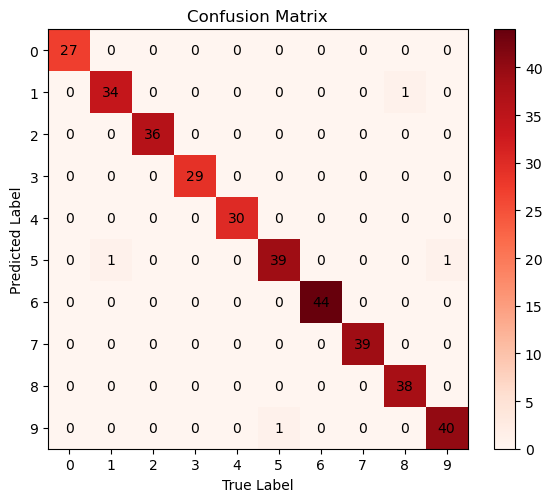

In [55]:
PlotConfusionMatrix(conf_matrix)

Additionally, we are able to compute useful metrics from it,

In [52]:
# Classification report,
conf_matrix.report()

Classification Accuracy: 0.989
β: 1

Class        Precision    Recall  Fβ-score   Support
----------------------------------------------------
0                1.000     1.000     1.000        27
1                0.971     0.971     0.971        35
2                1.000     1.000     1.000        36
3                1.000     1.000     1.000        29
4                1.000     1.000     1.000        30
5                0.951     0.975     0.951        40
6                1.000     1.000     1.000        44
7                1.000     1.000     1.000        39
8                1.000     0.974     1.000        39
9                0.976     0.976     0.976        41
----------------------------------------------------
Average              0.990     0.990     0.990
Weighted-average     0.989     0.989     0.989


### References

https://www.youtube.com/watch?v=LxcRFNRgLCs

https://www.youtube.com/watch?v=2osIZ-dSPGE